In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dynamic_disagreeing_neighbors.model.instance_hardness import *
from dynamic_disagreeing_neighbors.model.ddn import *
from dynamic_disagreeing_neighbors.visualization.plots import plot_decile_distribution

np.random.seed(1234)

n = 300

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [3]:
y.sum()

np.int64(600)

## Conjunto de datos de train

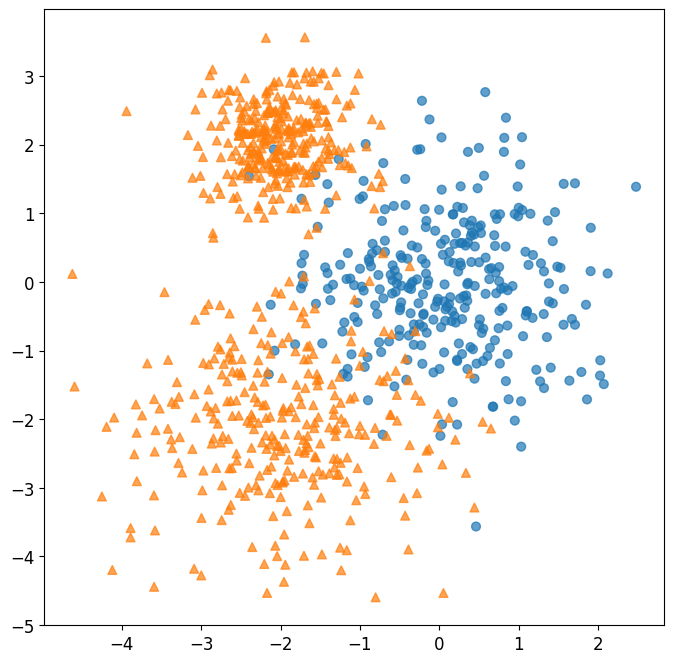

In [4]:
figure = plt.figure(figsize=[8, 8])
ax = figure.add_subplot()

area1 = np.ma.masked_where(y > 0 , y) + 40
area2 = np.ma.masked_where(y < 1, y) + 39


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, a in [('o', area1), ('^', area2)]:
    ax.scatter(X[:,0], X[:,1], alpha=0.7, s=a, marker=m)

ax.tick_params(axis='both', labelsize=12)

plt.show()

In [5]:
figure.savefig('images/data_artificial.png', bbox_inches='tight');

### Compute complexity

#### KDN

In [6]:
complexity, _ = kdn_score(X, y, 5)

In [7]:
complexity_series = pd.Series(complexity)
complexity_series[complexity_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    199.000000
mean       0.420101
std        0.274134
min        0.200000
10%        0.200000
20%        0.200000
30%        0.200000
40%        0.200000
50%        0.400000
60%        0.400000
70%        0.400000
80%        0.600000
90%        0.840000
max        1.000000
dtype: float64

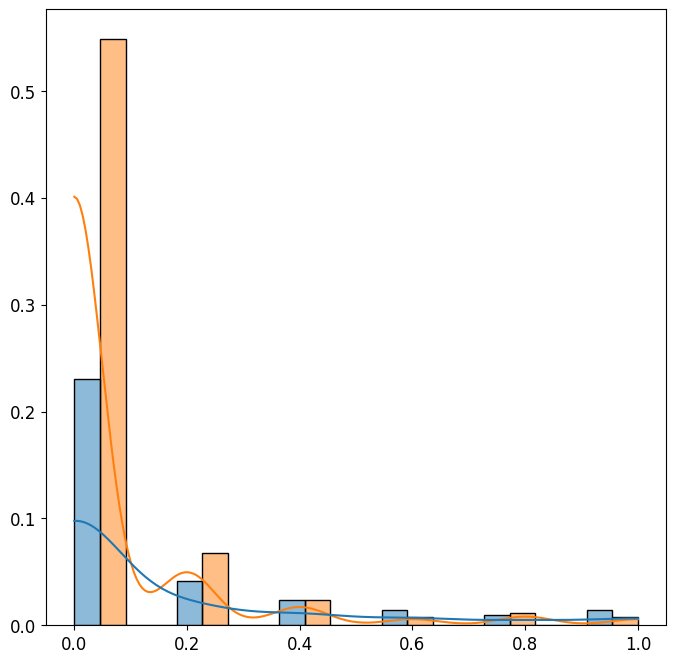

In [8]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [9]:
figure.savefig('images/kdn_artificial.png', bbox_inches='tight');

In [10]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y < 1])
class1_complexity = np.mean(complexity[y > 0])

In [11]:
global_complexity

np.float64(0.09288888888888888)

In [12]:
class1_complexity

np.float64(0.06633333333333334)

In [13]:
class0_complexity

np.float64(0.146)

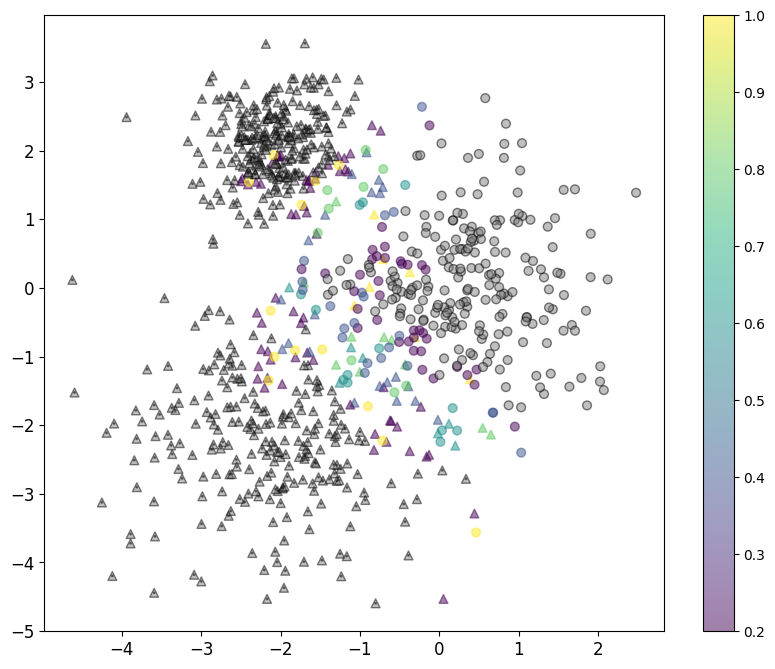

In [14]:
# Point areas
area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0, y) + 40

# Mask complexity <= 0
masked_complexity = np.ma.masked_where(complexity <= 0, complexity)

figure, ax = plt.subplots(figsize=[10, 8])

# Scatter plot
sc1 = ax.scatter(X[:, 0], X[:, 1], c=masked_complexity, alpha=0.5, s=area1, marker='^', cmap='viridis')
sc2 = ax.scatter(X[:, 0], X[:, 1], c=masked_complexity, alpha=0.5, s=area2, marker='o', cmap='viridis')

# Mask complexity == 0
mask_0 = complexity == 0
ax.scatter(X[mask_0, 0], X[mask_0, 1], c='gray', alpha=0.5, s=np.asarray(area1)[mask_0], marker='^', edgecolor='black')
ax.scatter(X[mask_0, 0], X[mask_0, 1], c='gray', alpha=0.5, s=np.asarray(area2)[mask_0], marker='o', edgecolor='black')

ax.tick_params(axis='both', labelsize=12)

# Colorbar
plt.colorbar(sc1)

plt.show()

In [15]:
figure.savefig('images/kdn_artificial_scatter.png', bbox_inches='tight');

#### DDN

In [16]:
ddn = DDN(k=2)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [17]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    148.000000
mean       0.538986
std        0.285773
min        0.090000
10%        0.197000
20%        0.260000
30%        0.340000
40%        0.468000
50%        0.500000
60%        0.520000
70%        0.645000
80%        1.000000
90%        1.000000
max        1.000000
dtype: float64

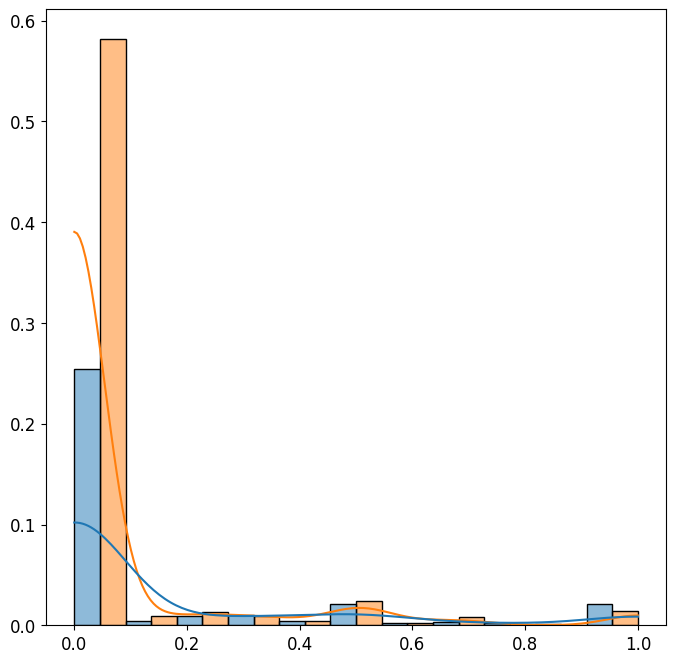

In [18]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [19]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [20]:
global_complexity_d

np.float64(0.08863333333333334)

In [21]:
class1_complexity_d

np.float64(0.06425)

In [22]:
class0_complexity_d

np.float64(0.1374)

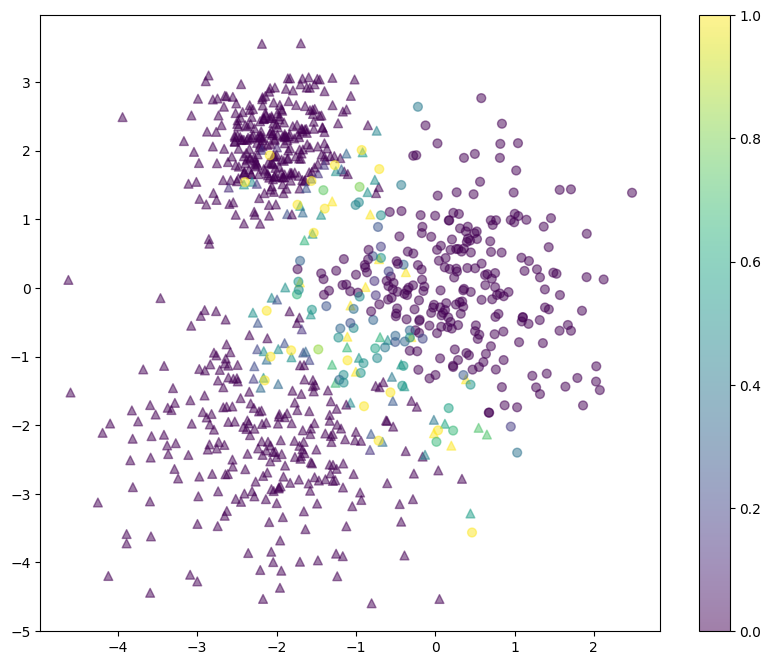

In [23]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')
plt.colorbar()

plt.show()

#### DDN

In [24]:
ddn = DDN(k=3)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [25]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    197.000000
mean       0.416345
std        0.283125
min        0.020000
10%        0.140000
20%        0.190000
30%        0.220000
40%        0.250000
50%        0.320000
60%        0.370000
70%        0.510000
80%        0.680000
90%        1.000000
max        1.000000
dtype: float64

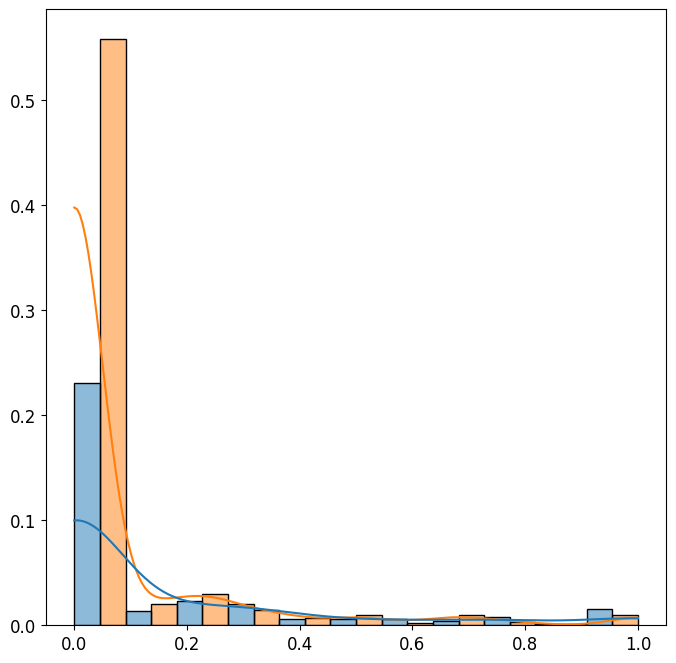

In [26]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [27]:
figure.savefig('images/ddn_artificial.png', bbox_inches='tight');

In [28]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [29]:
global_complexity_d

np.float64(0.09113333333333334)

In [30]:
class1_complexity_d

np.float64(0.06578333333333333)

In [31]:
class0_complexity_d

np.float64(0.14183333333333334)

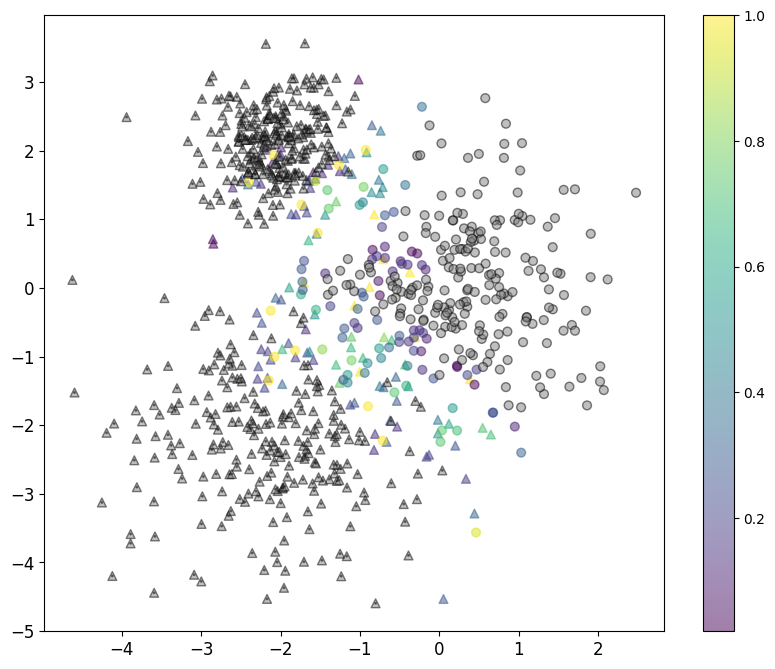

In [32]:
# Point areas
area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0, y) + 40

# Mask complexity <= 0
masked_complexity = np.ma.masked_where(complexity_d <= 0, complexity_d)

figure, ax = plt.subplots(figsize=[10, 8])

# Scatter plot
sc1 = ax.scatter(X[:, 0], X[:, 1], c=masked_complexity, alpha=0.5, s=area1, marker='^', cmap='viridis')
sc2 = ax.scatter(X[:, 0], X[:, 1], c=masked_complexity, alpha=0.5, s=area2, marker='o', cmap='viridis')

# Mask complexity == 0
mask_0 = complexity_d == 0
ax.scatter(X[mask_0, 0], X[mask_0, 1], c='gray', alpha=0.5, s=np.asarray(area1)[mask_0], marker='^', edgecolor='black')
ax.scatter(X[mask_0, 0], X[mask_0, 1], c='gray', alpha=0.5, s=np.asarray(area2)[mask_0], marker='o', edgecolor='black')

ax.tick_params(axis='both', labelsize=12)

# Colorbar
plt.colorbar(sc1)

plt.show()

In [33]:
figure.savefig('images/ddn_artificial_scatter.png', bbox_inches='tight');

#### DDN

In [34]:
ddn = DDN(k=4)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [35]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    220.000000
mean       0.374409
std        0.280611
min        0.010000
10%        0.120000
20%        0.158000
30%        0.187000
40%        0.210000
50%        0.250000
60%        0.338000
70%        0.456000
80%        0.642000
90%        0.840000
max        1.000000
dtype: float64

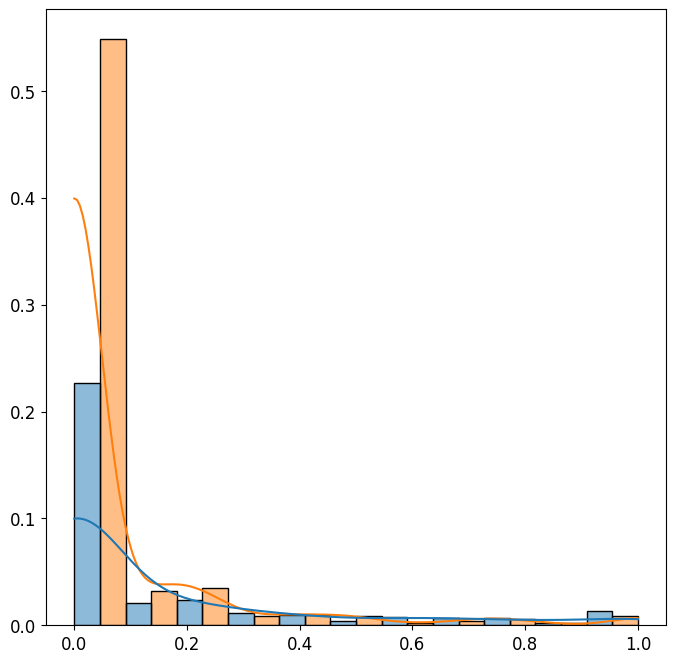

In [36]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [37]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [38]:
global_complexity_d

np.float64(0.09152222222222223)

In [39]:
class1_complexity_d

np.float64(0.066)

In [40]:
class0_complexity_d

np.float64(0.14256666666666667)

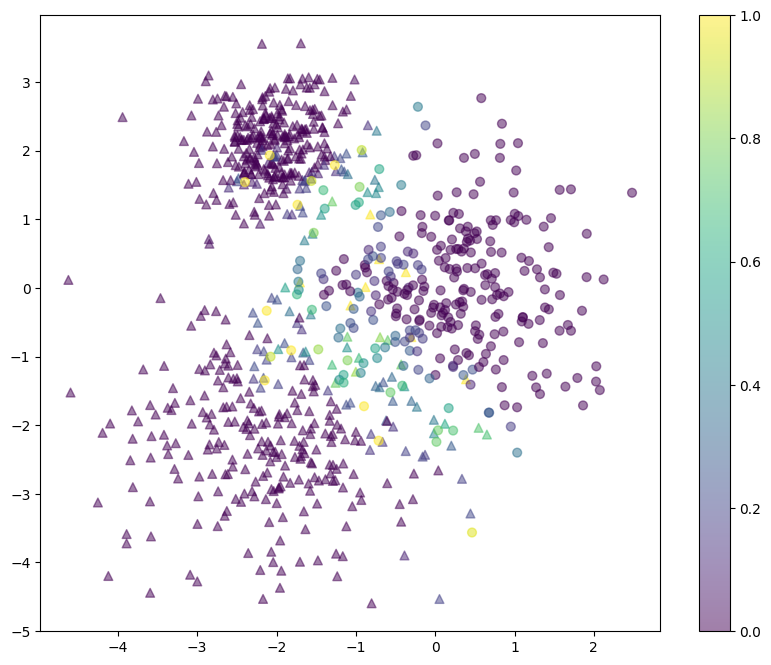

In [41]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### DDN

In [42]:
ddn = DDN(k=4)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [43]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    220.000000
mean       0.374409
std        0.280611
min        0.010000
10%        0.120000
20%        0.158000
30%        0.187000
40%        0.210000
50%        0.250000
60%        0.338000
70%        0.456000
80%        0.642000
90%        0.840000
max        1.000000
dtype: float64

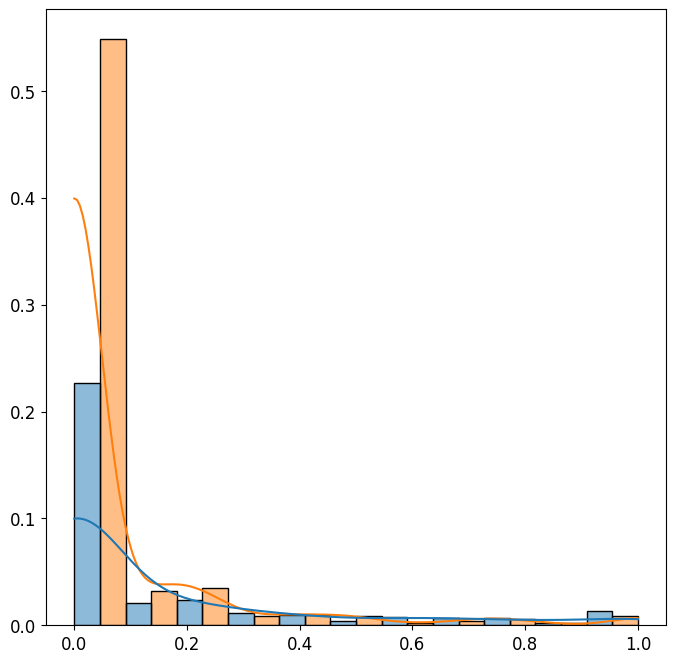

In [44]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [45]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [46]:
global_complexity_d

np.float64(0.09152222222222223)

In [47]:
class1_complexity_d

np.float64(0.066)

In [48]:
class0_complexity_d

np.float64(0.14256666666666667)

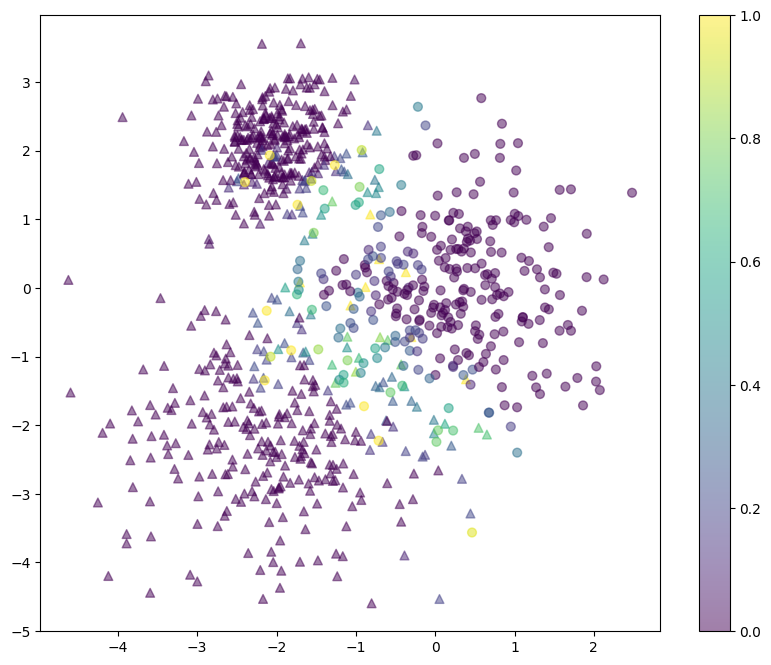

In [49]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### DDN

In [50]:
ddn = DDN(k=5)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [51]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    242.000000
mean       0.341570
std        0.276382
min        0.010000
10%        0.090000
20%        0.130000
30%        0.150000
40%        0.180000
50%        0.215000
60%        0.326000
70%        0.400000
80%        0.580000
90%        0.838000
max        1.000000
dtype: float64

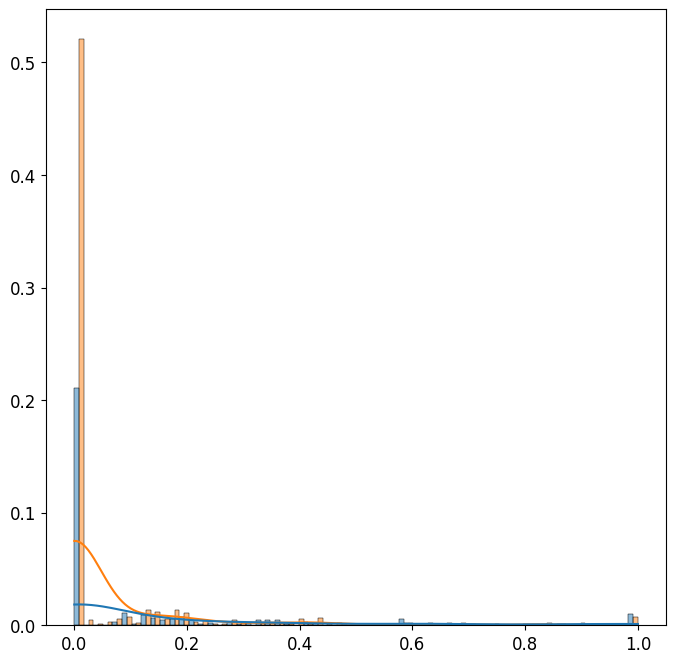

In [52]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion', legend=False)
axes.set_ylabel('')
axes.tick_params(axis='both', labelsize=12)

In [53]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [54]:
global_complexity_d

np.float64(0.09184444444444444)

In [55]:
class1_complexity_d

np.float64(0.06588333333333334)

In [56]:
class0_complexity_d

np.float64(0.14376666666666668)

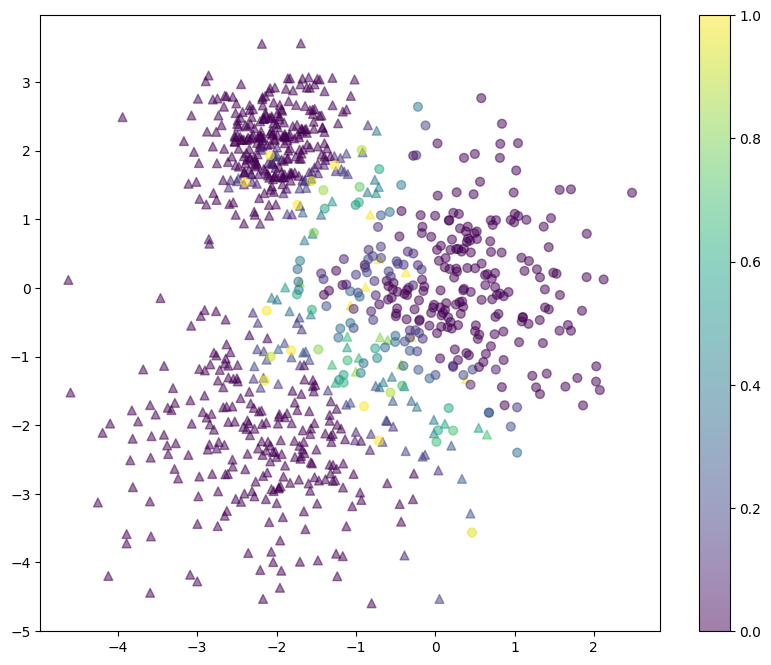

In [57]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

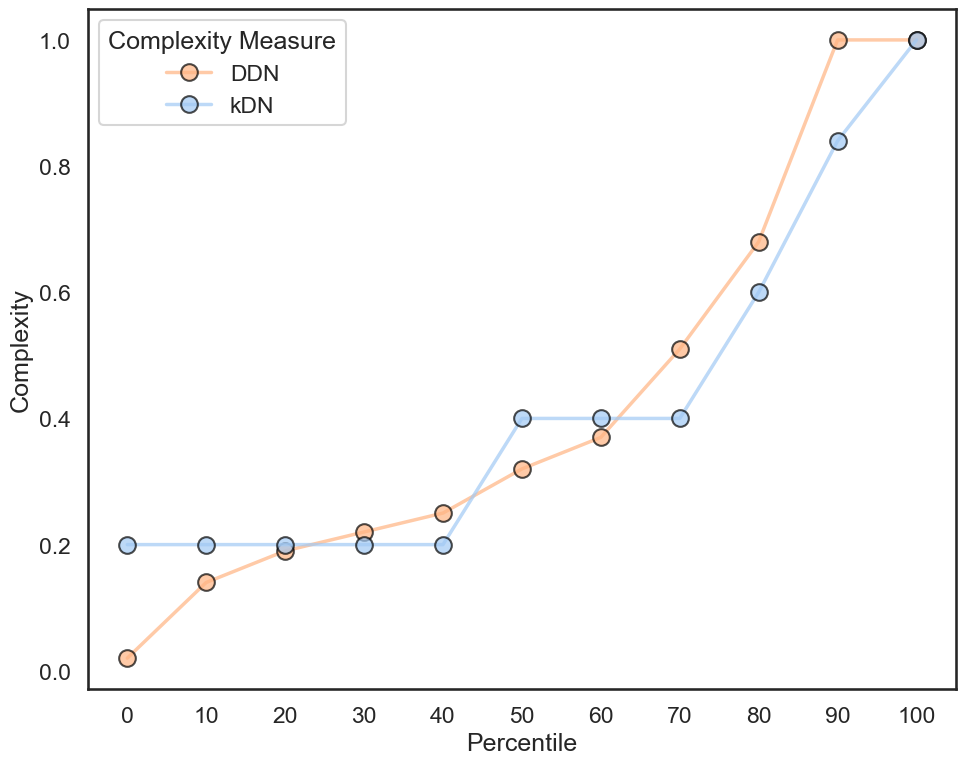

In [58]:
plot_decile_distribution();
